<a href="https://colab.research.google.com/github/Teganmosi/pips-prediction/blob/main/575.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import ast
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = pd.read_excel('/content/575.xlsx')

In [ ]:
data.head()

,timestamp_hour,prev_pip,previous 9 number,prev 9 pip change,prev9 prices,pips
0,6,-1,"[5, 7, 3, 3, 3, 7, 5, 7, 5]","[0, 1, 0, 0, -1, 0, 0, 0]","[1.1872, 1.18725, 1.1873, 1.18735, 1.1873, 1.1...",1
1,6,-2,"[3, 3, 3, 7, 5, 7, 5, 7, 5]","[0, 0, -1, 0, 0, 0, 0, 0]","[1.1873, 1.18735, 1.1873, 1.18725, 1.1872, 1.1...",2
2,7,-1,"[5, 7, 5, 7, 5, 5, 5, 7, 5]","[-1, 1, -1, 1, 0, 0, -1, 1]","[1.1862, 1.18615, 1.1862, 1.18615, 1.1862, 1.1...",-1
3,7,-1,"[7, 2, 7, 2, 7, 7, 5, 7, 5]","[-1, 1, -1, 1, 0, 1, -1, 1]","[1.1861, 1.18605, 1.1861, 1.18605, 1.1861, 1.1...",1
4,12,-1,"[5, 3, 5, 3, 5, 5, 5, 7, 5]","[1, -1, 1, -1, 0, 0, -1, 1]","[1.19055, 1.1906, 1.19055, 1.1906, 1.19055, 1....",0


##Data Preprocessing

In [ ]:
# Function to extract numbers from a list
def extract_numbers(lst_str):
    lst = ast.literal_eval(lst_str)
    return [float(num) for num in lst]

# Extract features from the lists using apply()
data['prev_9_num_1'] = data['previous 9 number'].apply(lambda x: extract_numbers(x)[0])
data['prev_9_num_2'] = data['previous 9 number'].apply(lambda x: extract_numbers(x)[1])
data['prev_9_num_3'] = data['previous 9 number'].apply(lambda x: extract_numbers(x)[2])
data['prev_9_num_4'] = data['previous 9 number'].apply(lambda x: extract_numbers(x)[3])
data['prev_9_num_5'] = data['previous 9 number'].apply(lambda x: extract_numbers(x)[4])
data['prev_9_num_6'] = data['previous 9 number'].apply(lambda x: extract_numbers(x)[5])
data['prev_9_num_7'] = data['previous 9 number'].apply(lambda x: extract_numbers(x)[6])
data['prev_9_num_8'] = data['previous 9 number'].apply(lambda x: extract_numbers(x)[7])
data['prev_9_num_9'] = data['previous 9 number'].apply(lambda x: extract_numbers(x)[8])
# ... continue extracting other elements from the lists

data['prev_8_pip_change_1'] = data['prev 9 pip change'].apply(lambda x: extract_numbers(x)[0])
data['prev_8_pip_change_2'] = data['prev 9 pip change'].apply(lambda x: extract_numbers(x)[1])
data['prev_8_pip_change_3'] = data['prev 9 pip change'].apply(lambda x: extract_numbers(x)[2])
data['prev_8_pip_change_4'] = data['prev 9 pip change'].apply(lambda x: extract_numbers(x)[3])
data['prev_8_pip_change_5'] = data['prev 9 pip change'].apply(lambda x: extract_numbers(x)[4])
data['prev_8_pip_change_6'] = data['prev 9 pip change'].apply(lambda x: extract_numbers(x)[5])
data['prev_8_pip_change_7'] = data['prev 9 pip change'].apply(lambda x: extract_numbers(x)[6])
data['prev_8_pip_change_8'] = data['prev 9 pip change'].apply(lambda x: extract_numbers(x)[7])
# ... continue extracting other elements from the lists

data['prev9_prices_1'] = data['prev9 prices'].apply(lambda x: extract_numbers(x)[0])
data['prev9_prices_2'] = data['prev9 prices'].apply(lambda x: extract_numbers(x)[1])
data['prev9_prices_3'] = data['prev9 prices'].apply(lambda x: extract_numbers(x)[2])
data['prev9_prices_4'] = data['prev9 prices'].apply(lambda x: extract_numbers(x)[3])
data['prev9_prices_5'] = data['prev9 prices'].apply(lambda x: extract_numbers(x)[4])
data['prev9_prices_6'] = data['prev9 prices'].apply(lambda x: extract_numbers(x)[5])
data['prev9_prices_7'] = data['prev9 prices'].apply(lambda x: extract_numbers(x)[6])
data['prev9_prices_8'] = data['prev9 prices'].apply(lambda x: extract_numbers(x)[7])
data['prev9_prices_9'] = data['prev9 prices'].apply(lambda x: extract_numbers(x)[8])
# ... continue extracting other elements from the lists

# Drop the original columns with lists
data = data.drop(columns=['previous 9 number', 'prev 9 pip change', 'prev9 prices'])

In [ ]:
data

,timestamp_hour,prev_pip,pips,prev_9_num_1,prev_9_num_2,prev_9_num_3,prev_9_num_4,prev_9_num_5,prev_9_num_6,prev_9_num_7,...,prev_8_pip_change_8,prev9_prices_1,prev9_prices_2,prev9_prices_3,prev9_prices_4,prev9_prices_5,prev9_prices_6,prev9_prices_7,prev9_prices_8,prev9_prices_9
0,6,-1,1,5.0,7.0,3.0,3.0,3.0,7.0,5.0,...,0.0,1.18720,1.18725,1.18730,1.18735,1.18730,1.18725,1.18720,1.18725,1.18720
1,6,-2,2,3.0,3.0,3.0,7.0,5.0,7.0,5.0,...,0.0,1.18730,1.18735,1.18730,1.18725,1.18720,1.18725,1.18720,1.18725,1.18720
2,7,-1,-1,5.0,7.0,5.0,7.0,5.0,5.0,5.0,...,1.0,1.18620,1.18615,1.18620,1.18615,1.18620,1.18625,1.18620,1.18615,1.18620
3,7,-1,1,7.0,2.0,7.0,2.0,7.0,7.0,5.0,...,1.0,1.18610,1.18605,1.18610,1.18605,1.18610,1.18615,1.18620,1.18615,1.18620
4,12,-1,0,5.0,3.0,5.0,3.0,5.0,5.0,5.0,...,1.0,1.19055,1.19060,1.19055,1.19060,1.19055,1.19050,1.19055,1.19045,1.19050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24154,12,1,3,5.0,7.0,7.0,7.0,7.0,7.0,5.0,...,1.0,1.10050,1.10045,1.10040,1.10045,1.10040,1.10045,1.10050,1.10045,1.10050
24155,12,-1,0,5.0,8.0,5.0,7.0,5.0,7.0,5.0,...,-52.0,1.10105,1.10110,1.10105,1.10620,1.10105,1.10620,1.10105,1.10620,1.10105
24156,13,-2,3,3.0,1.0,3.0,1.0,3.0,3.0,5.0,...,1.0,1.10060,1.10065,1.10060,1.10065,1.10060,1.10055,1.10050,1.10045,1.10050
24157,15,-52,-2,7.0,5.0,9.0,5.0,7.0,4.0,5.0,...,0.0,1.10460,1.10470,1.10465,1.10470,1.10475,1.10985,1.10470,1.10475,1.10470


In [ ]:
data.columns

Index(['timestamp_hour', 'prev_pip', 'pips', 'prev_9_num_1', 'prev_9_num_2',
       'prev_9_num_3', 'prev_9_num_4', 'prev_9_num_5', 'prev_9_num_6',
       'prev_9_num_7', 'prev_9_num_8', 'prev_9_num_9', 'prev_8_pip_change_1',
       'prev_8_pip_change_2', 'prev_8_pip_change_3', 'prev_8_pip_change_4',
       'prev_8_pip_change_5', 'prev_8_pip_change_6', 'prev_8_pip_change_7',
       'prev_8_pip_change_8', 'prev9_prices_1', 'prev9_prices_2',
       'prev9_prices_3', 'prev9_prices_4', 'prev9_prices_5', 'prev9_prices_6',
       'prev9_prices_7', 'prev9_prices_8', 'prev9_prices_9'],
      dtype='object')

In [ ]:
data.dtypes

timestamp_hour           int64
prev_pip                 int64
pips                     int64
prev_9_num_1           float64
prev_9_num_2           float64
prev_9_num_3           float64
prev_9_num_4           float64
prev_9_num_5           float64
prev_9_num_6           float64
prev_9_num_7           float64
prev_9_num_8           float64
prev_9_num_9           float64
prev_8_pip_change_1    float64
prev_8_pip_change_2    float64
prev_8_pip_change_3    float64
prev_8_pip_change_4    float64
prev_8_pip_change_5    float64
prev_8_pip_change_6    float64
prev_8_pip_change_7    float64
prev_8_pip_change_8    float64
prev9_prices_1         float64
prev9_prices_2         float64
prev9_prices_3         float64
prev9_prices_4         float64
prev9_prices_5         float64
prev9_prices_6         float64
prev9_prices_7         float64
prev9_prices_8         float64
prev9_prices_9         float64
dtype: object

In [ ]:
selected_columns = ['timestamp_hour', 'prev_pip', 'prev_9_num_1', 'prev_9_num_2', 'prev_9_num_3', 'prev_9_num_4',
                    'prev_9_num_5', 'prev_9_num_6', 'prev_9_num_7', 'prev_9_num_8', 'prev_9_num_9',
                    'prev_8_pip_change_1', 'prev_8_pip_change_2', 'prev_8_pip_change_3', 'prev_8_pip_change_4',
                    'prev_8_pip_change_5', 'prev_8_pip_change_6', 'prev_8_pip_change_7', 'prev_8_pip_change_8',
                    'prev9_prices_1', 'prev9_prices_2', 'prev9_prices_3', 'prev9_prices_4', 'prev9_prices_5',
                    'prev9_prices_6', 'prev9_prices_7', 'prev9_prices_8', 'prev9_prices_9', 'pips']
data = data[selected_columns].astype(float)  # Convert selected columns to float

In [ ]:
data

,timestamp_hour,prev_pip,prev_9_num_1,prev_9_num_2,prev_9_num_3,prev_9_num_4,prev_9_num_5,prev_9_num_6,prev_9_num_7,prev_9_num_8,...,prev9_prices_1,prev9_prices_2,prev9_prices_3,prev9_prices_4,prev9_prices_5,prev9_prices_6,prev9_prices_7,prev9_prices_8,prev9_prices_9,pips
0,6.0,-1.0,5.0,7.0,3.0,3.0,3.0,7.0,5.0,7.0,...,1.18720,1.18725,1.18730,1.18735,1.18730,1.18725,1.18720,1.18725,1.18720,1.0
1,6.0,-2.0,3.0,3.0,3.0,7.0,5.0,7.0,5.0,7.0,...,1.18730,1.18735,1.18730,1.18725,1.18720,1.18725,1.18720,1.18725,1.18720,2.0
2,7.0,-1.0,5.0,7.0,5.0,7.0,5.0,5.0,5.0,7.0,...,1.18620,1.18615,1.18620,1.18615,1.18620,1.18625,1.18620,1.18615,1.18620,-1.0
3,7.0,-1.0,7.0,2.0,7.0,2.0,7.0,7.0,5.0,7.0,...,1.18610,1.18605,1.18610,1.18605,1.18610,1.18615,1.18620,1.18615,1.18620,1.0
4,12.0,-1.0,5.0,3.0,5.0,3.0,5.0,5.0,5.0,7.0,...,1.19055,1.19060,1.19055,1.19060,1.19055,1.19050,1.19055,1.19045,1.19050,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24154,12.0,1.0,5.0,7.0,7.0,7.0,7.0,7.0,5.0,7.0,...,1.10050,1.10045,1.10040,1.10045,1.10040,1.10045,1.10050,1.10045,1.10050,3.0
24155,12.0,-1.0,5.0,8.0,5.0,7.0,5.0,7.0,5.0,7.0,...,1.10105,1.10110,1.10105,1.10620,1.10105,1.10620,1.10105,1.10620,1.10105,0.0
24156,13.0,-2.0,3.0,1.0,3.0,1.0,3.0,3.0,5.0,7.0,...,1.10060,1.10065,1.10060,1.10065,1.10060,1.10055,1.10050,1.10045,1.10050,3.0
24157,15.0,-52.0,7.0,5.0,9.0,5.0,7.0,4.0,5.0,7.0,...,1.10460,1.10470,1.10465,1.10470,1.10475,1.10985,1.10470,1.10475,1.10470,-2.0


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras import regularizers
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, RegressorMixin
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
# Step 2: Split the data
X = data.iloc[:, :-1].values  # Input sequences (all columns except 'pips   (OUTPUT)')
y = data.iloc[:, -1].values   # Target variable ('pips   (OUTPUT)')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 3: Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Step 4: Reshape the data
# Reshape the input sequences to match the LSTM input shape [samples, time steps, features]
X_train_reshaped = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

##LSTM model

In [ ]:
# Step 5: Build the LSTM model
model = Sequential()
model.add(LSTM(units=64, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
# Step 6: Train the LSTM model
model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
604/604 [==============================] - 10s 5ms/step - loss: 250.7736
Epoch 2/10
604/604 [==============================] - 3s 4ms/step - loss: 230.1599
Epoch 3/10
604/604 [==============================] - 2s 4ms/step - loss: 200.5484
Epoch 4/10
604/604 [==============================] - 2s 4ms/step - loss: 182.7716
Epoch 5/10
604/604 [==============================] - 2s 4ms/step - loss: 175.5626
Epoch 6/10
604/604 [==============================] - 3s 5ms/step - loss: 172.2941
Epoch 7/10
604/604 [==============================] - 2s 4ms/step - loss: 170.3339
Epoch 8/10
604/604 [==============================] - 3s 5ms/step - loss: 169.1355
Epoch 9/10
604/604 [==============================] - 3s 4ms/step - loss: 167.9764
Epoch 10/10
604/604 [==============================] - 3s 5ms/step - loss: 166.6529


In [ ]:
# Step 7: Evaluate the LSTM model
train_loss = model.evaluate(X_train_reshaped, y_train, verbose=0)
test_loss = model.evaluate(X_test_reshaped, y_test, verbose=0)
print(f"Train Loss: {train_loss:.4f}")
print(f"Test Loss: {test_loss:.4f}")

Train Loss: 169.3632
Test Loss: 175.6570


In [ ]:
# Assuming you have a new input sequence called 'new_input_sequence'
new_input_sequence = np.array([[6, -2, 3.0, 3.0, 3.0, 7.0, 5.0, 7.0, 5.0, 7.0, 7.0, 5.0, 5.0, 5.0, 3.0, 5.0, 5.0,
                                5.0, 0.0, 1.18730, 1.18735, 1.18730, 1.18725, 1.18720, 1.18725, 1.18720, 1.18725,
                                1.18720]])
new_input_sequence_scaled = scaler.transform(new_input_sequence)
new_input_sequence_reshaped = np.reshape(new_input_sequence_scaled, (new_input_sequence_scaled.shape[0], 1,
                                                                     new_input_sequence_scaled.shape[1]))


In [ ]:
predicted_pips = model.predict(new_input_sequence_reshaped)
print(f"Predicted pips: {predicted_pips[0][0]}")

1/1 [==============================] - 0s 371ms/step
Predicted pips: 6.601790428161621


In [ ]:
# Reshape the input sequences to match the LSTM input shape [samples, time steps, features]
X_train_reshaped = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Step 5: Build the LSTM model with regularization
model = Sequential()
model.add(LSTM(units=128, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]),
               return_sequences=True, kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.2))
model.add(LSTM(units=64, kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Step 6: Train the LSTM model
model.fit(X_train_reshaped, y_train, epochs=20, batch_size=32, verbose=1)

# Step 7: Evaluate the LSTM model
train_loss = model.evaluate(X_train_reshaped, y_train, verbose=0)
test_loss = model.evaluate(X_test_reshaped, y_test, verbose=0)
print(f"Train Loss: {train_loss:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Step 8: Predict using test data
y_test_pred = model.predict(X_test_reshaped)

# Step 9: Evaluate the predictions
test_mae = np.mean(np.abs(y_test_pred - y_test))
test_rmse = np.sqrt(np.mean(np.square(y_test_pred - y_test)))

print(f"Test MAE: {test_mae:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")


Epoch 1/20
604/604 [==============================] - 7s 6ms/step - loss: 235.9960
Epoch 2/20
604/604 [==============================] - 4s 7ms/step - loss: 190.5679
Epoch 3/20
604/604 [==============================] - 3s 6ms/step - loss: 176.5435
Epoch 4/20
604/604 [==============================] - 3s 6ms/step - loss: 171.0377
Epoch 5/20
604/604 [==============================] - 4s 7ms/step - loss: 168.7159
Epoch 6/20
604/604 [==============================] - 3s 6ms/step - loss: 166.3416
Epoch 7/20
604/604 [==============================] - 3s 6ms/step - loss: 164.5182
Epoch 8/20
604/604 [==============================] - 4s 6ms/step - loss: 165.6678
Epoch 9/20
604/604 [==============================] - 4s 7ms/step - loss: 163.8443
Epoch 10/20
604/604 [==============================] - 3s 6ms/step - loss: 162.9326
Epoch 11/20
604/604 [==============================] - 4s 6ms/step - loss: 162.6943
Epoch 12/20
604/604 [==============================] - 4s 7ms/step - loss: 161.6420
E

##LSTM GridSearch

In [ ]:
# Step 4: Reshape the data
# Reshape the input sequences to match the LSTM input shape [samples, time steps, features]
X_train_reshaped = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Step 5: Define the custom wrapper class for Keras model
class KerasRegressorWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, units=64, dropout=0.2, l2_reg=0.001, epochs=20, batch_size=32, verbose=1):
        self.units = units
        self.dropout = dropout
        self.l2_reg = l2_reg
        self.epochs = epochs
        self.batch_size = batch_size
        self.verbose = verbose

        self.model = None

    def create_model(self):
        model = Sequential()
        model.add(LSTM(units=self.units, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]),
                       return_sequences=True, kernel_regularizer=regularizers.l2(self.l2_reg)))
        model.add(Dropout(self.dropout))
        model.add(LSTM(units=self.units, kernel_regularizer=regularizers.l2(self.l2_reg)))
        model.add(Dropout(self.dropout))
        model.add(Dense(units=1))
        model.compile(loss='mean_squared_error', optimizer='adam')
        return model

    def fit(self, X, y):
        self.model = self.create_model()
        self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=self.verbose)
        return self

    def predict(self, X):
        return self.model.predict(X)

# Step 6: Define the model
model = KerasRegressorWrapper()

# Step 7: Define the hyperparameters to be tuned
param_grid = {
    'units': [64, 128],
    'dropout': [0.2, 0.3],
    'l2_reg': [0.001, 0.01]
}

# Step 8: Perform grid search for hyperparameter tuning
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)

# Step 9: Fit the grid search to the training data
grid.fit(X_train_reshaped, y_train)

# Step 10: Print the best hyperparameters and corresponding performance
print(f"Best: {grid.best_score_:.4f} using {grid.best_params_}")

# Step 11: Evaluate the LSTM model with the best hyperparameters
best_model = grid.best_estimator_
train_loss = best_model.score(X_train_reshaped, y_train)
test_loss = best_model.score(X_test_reshaped, y_test)
print(f"Train Loss: {train_loss:.4f}")
print(f"Test Loss: {test_loss:.4f}")

Epoch 1/20
403/403 [==============================] - 6s 6ms/step - loss: 257.8850
Epoch 2/20
403/403 [==============================] - 2s 6ms/step - loss: 213.4007
Epoch 3/20
403/403 [==============================] - 2s 6ms/step - loss: 191.1326
Epoch 4/20
403/403 [==============================] - 3s 8ms/step - loss: 184.3038
Epoch 5/20
403/403 [==============================] - 2s 6ms/step - loss: 177.5648
Epoch 6/20
403/403 [==============================] - 2s 6ms/step - loss: 176.1144
Epoch 7/20
403/403 [==============================] - 2s 6ms/step - loss: 173.6768
Epoch 8/20
403/403 [==============================] - 2s 6ms/step - loss: 171.5182
Epoch 9/20
403/403 [==============================] - 3s 7ms/step - loss: 171.2446
Epoch 10/20
403/403 [==============================] - 2s 6ms/step - loss: 169.2709
Epoch 11/20
403/403 [==============================] - 2s 6ms/step - loss: 168.5119
Epoch 12/20
403/403 [==============================] - 2s 6ms/step - loss: 168.9636
E

151/151 [==============================] - 0s 3ms/step
Train Loss: 0.3875
Test Loss: 0.3135
151/151 [==============================] - 0s 3ms/step


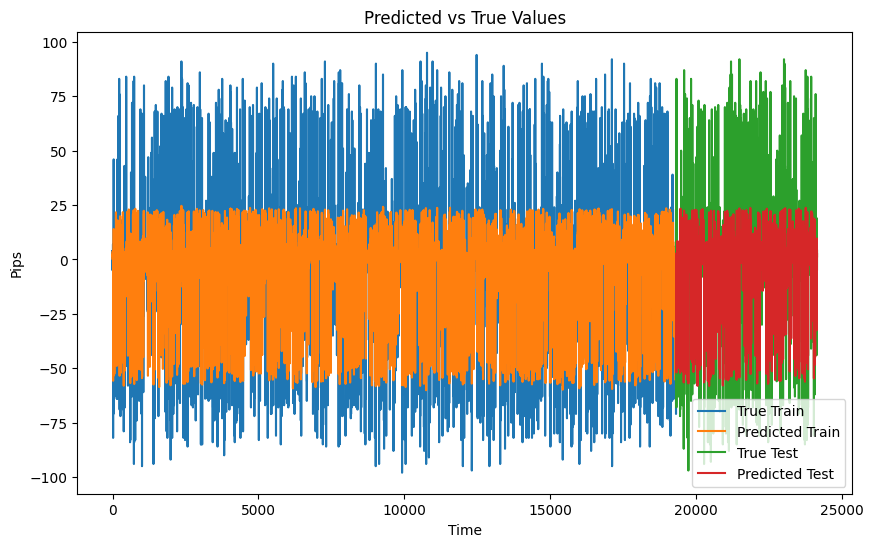

In [ ]:
# Step 11: Evaluate the LSTM model with the best hyperparameters
best_model = grid.best_estimator_
train_loss = best_model.score(X_train_reshaped, y_train)
test_loss = best_model.score(X_test_reshaped, y_test)
print(f"Train Loss: {train_loss:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Step 12: Make predictions
y_train_pred = best_model.predict(X_train_reshaped)
y_test_pred = best_model.predict(X_test_reshaped)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(y_train, label='True Train')
plt.plot(y_train_pred, label='Predicted Train')
plt.plot(len(y_train) + np.arange(len(y_test)), y_test, label='True Test')
plt.plot(len(y_train) + np.arange(len(y_test)), y_test_pred, label='Predicted Test')
plt.title('Predicted vs True Values')
plt.xlabel('Time')
plt.ylabel('Pips')
plt.legend()
plt.show()

151/151 [==============================] - 0s 3ms/step
Train Loss: 0.3875
Test Loss: 0.3135
151/151 [==============================] - 0s 3ms/step


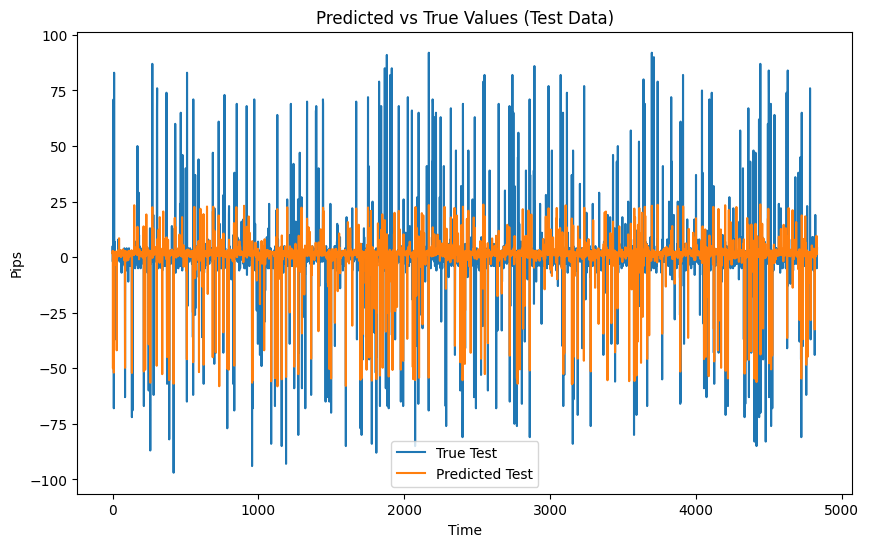

In [ ]:
# Step 11: Evaluate the LSTM model with the best hyperparameters
best_model = grid.best_estimator_
train_loss = best_model.score(X_train_reshaped, y_train)
test_loss = best_model.score(X_test_reshaped, y_test)
print(f"Train Loss: {train_loss:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Step 12: Make predictions
y_test_pred = best_model.predict(X_test_reshaped)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True Test')
plt.plot(y_test_pred, label='Predicted Test')
plt.title('Predicted vs True Values (Test Data)')
plt.xlabel('Time')
plt.ylabel('Pips')
plt.legend()
plt.show()

##Linear Regression

In [ ]:
# Assuming your data is stored in X_train and y_train for training, X_test and y_test for testing

# Reshape the data for linear regression (if needed)
X_train_reshaped = X_train.reshape(-1, X_train.shape[1])
X_test_reshaped = X_test.reshape(-1, X_test.shape[1])

In [ ]:
model = LinearRegression()
model.fit(X_train_reshaped, y_train)

LinearRegression()

In [ ]:
y_test_pred = model.predict(X_test_reshaped)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
mae = mean_absolute_error(y_test, y_test_pred)
rmse = mean_squared_error(y_test, y_test_pred, squared=False)
print(f"Test MAE: {mae:.4f}")
print(f"Test RMSE: {rmse:.4f}")

Test MAE: 5.9169
Test RMSE: 13.3378


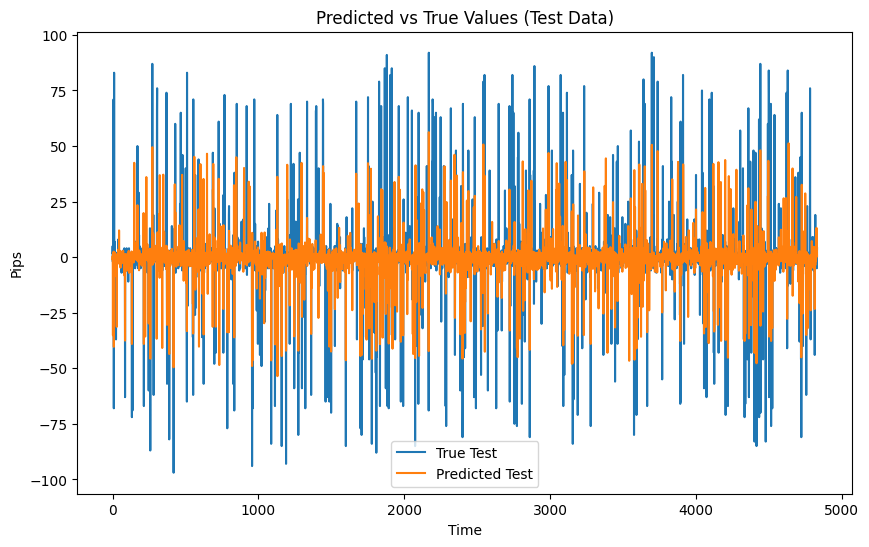

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True Test')
plt.plot(y_test_pred, label='Predicted Test')
plt.title('Predicted vs True Values (Test Data)')
plt.xlabel('Time')
plt.ylabel('Pips')
plt.legend()
plt.show()

##GradientBoostingRegressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Create the model
gbm_model = GradientBoostingRegressor()

# Train the model
gbm_model.fit(X_train, y_train)

# Predict on the test set
y_test_pred_gbm = gbm_model.predict(X_test)

# Calculate test metrics
test_mae_gbm = mean_absolute_error(y_test, y_test_pred_gbm)
test_rmse_gbm = mean_squared_error(y_test, y_test_pred_gbm, squared=False)

print(f"GBM Test MAE: {test_mae_gbm:.4f}")
print(f"GBM Test RMSE: {test_rmse_gbm:.4f}")


GBM Test MAE: 5.2751
GBM Test RMSE: 12.7799


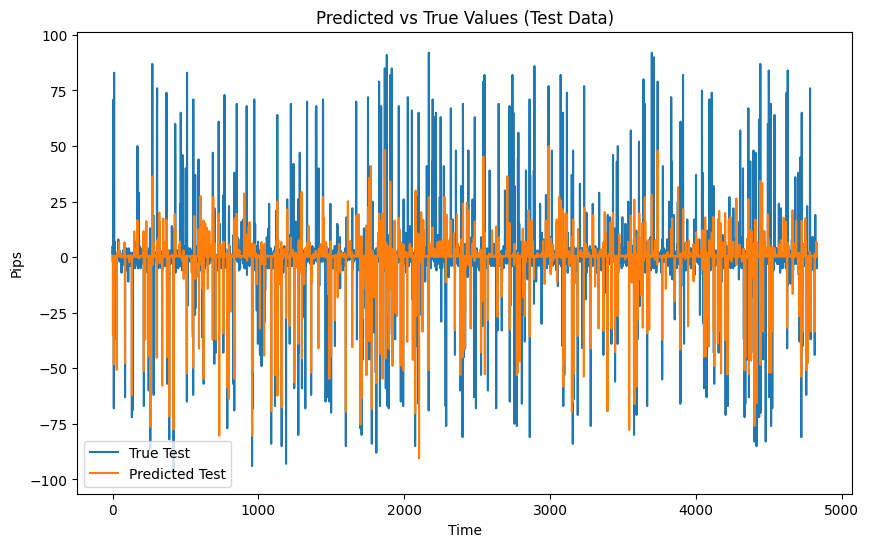

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True Test')
plt.plot(y_test_pred_gbm, label='Predicted Test')
plt.title('Predicted vs True Values (Test Data)')
plt.xlabel('Time')
plt.ylabel('Pips')
plt.legend()
plt.show()

##SVM

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Create the model
svm_model = SVR()

# Train the model
svm_model.fit(X_train, y_train)

# Predict on the test set
y_test_pred_svm = svm_model.predict(X_test)

# Calculate test metrics
test_mae_svm = mean_absolute_error(y_test, y_test_pred_svm)
test_rmse_svm = mean_squared_error(y_test, y_test_pred_svm, squared=False)

print(f"SVM Test MAE: {test_mae_svm:.4f}")
print(f"SVM Test RMSE: {test_rmse_svm:.4f}")


SVM Test MAE: 5.4045
SVM Test RMSE: 14.5723


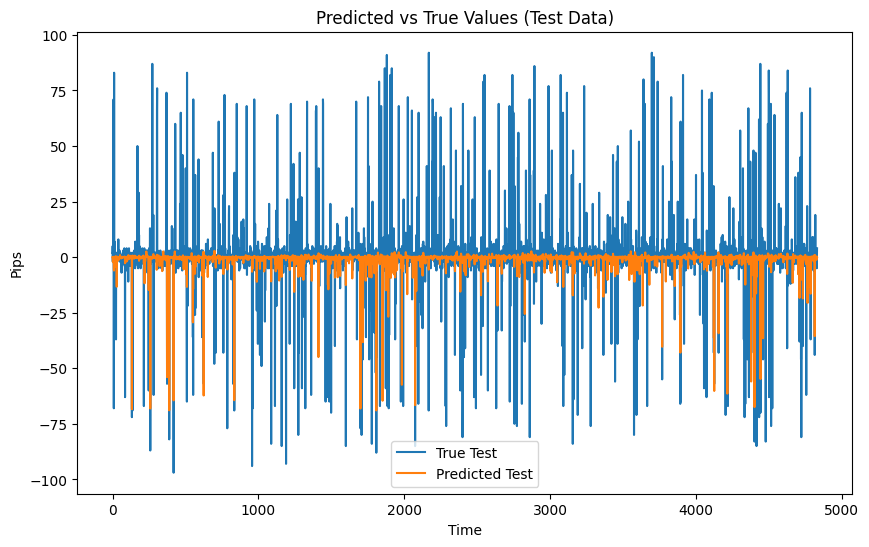

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True Test')
plt.plot(y_test_pred_svm, label='Predicted Test')
plt.title('Predicted vs True Values (Test Data)')
plt.xlabel('Time')
plt.ylabel('Pips')
plt.legend()
plt.show()

##xgboost

In [ ]:

import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Create the model
xgb_model = xgb.XGBRegressor()

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_test_pred_xgb = xgb_model.predict(X_test)

# Calculate test metrics
test_mae_xgb = mean_absolute_error(y_test, y_test_pred_xgb)
test_rmse_xgb = mean_squared_error(y_test, y_test_pred_xgb, squared=False)

print(f"XGBoost Test MAE: {test_mae_xgb:.4f}")
print(f"XGBoost Test RMSE: {test_rmse_xgb:.4f}")


XGBoost Test MAE: 5.5461
XGBoost Test RMSE: 13.3791


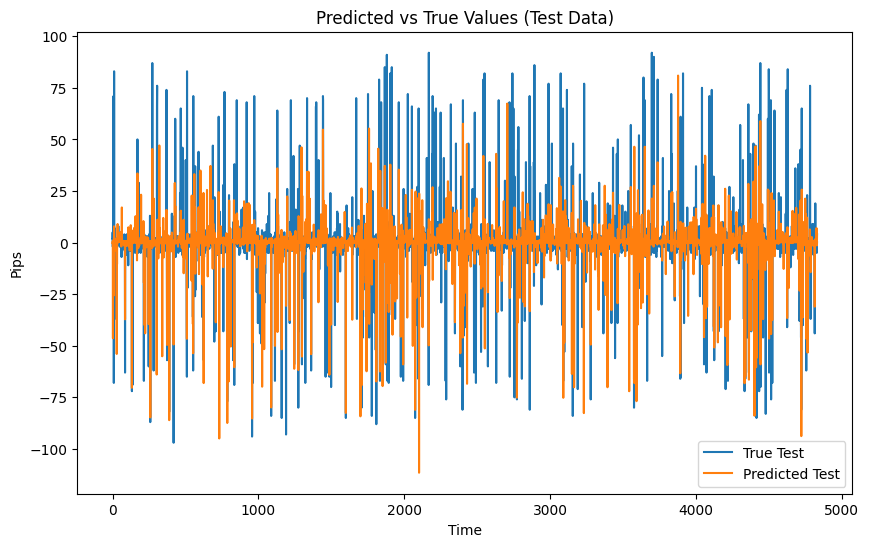

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True Test')
plt.plot(y_test_pred_xgb, label='Predicted Test')
plt.title('Predicted vs True Values (Test Data)')
plt.xlabel('Time')
plt.ylabel('Pips')
plt.legend()
plt.show()

##RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Create the model
rf_model = RandomForestRegressor()

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_test_pred_rf = rf_model.predict(X_test)

# Calculate test metrics
test_mae_rf = mean_absolute_error(y_test, y_test_pred_rf)
test_rmse_rf = mean_squared_error(y_test, y_test_pred_rf, squared=False)

print(f"Random Forest Test MAE: {test_mae_rf:.4f}")
print(f"Random Forest Test RMSE: {test_rmse_rf:.4f}")


Random Forest Test MAE: 5.5712
Random Forest Test RMSE: 12.9624


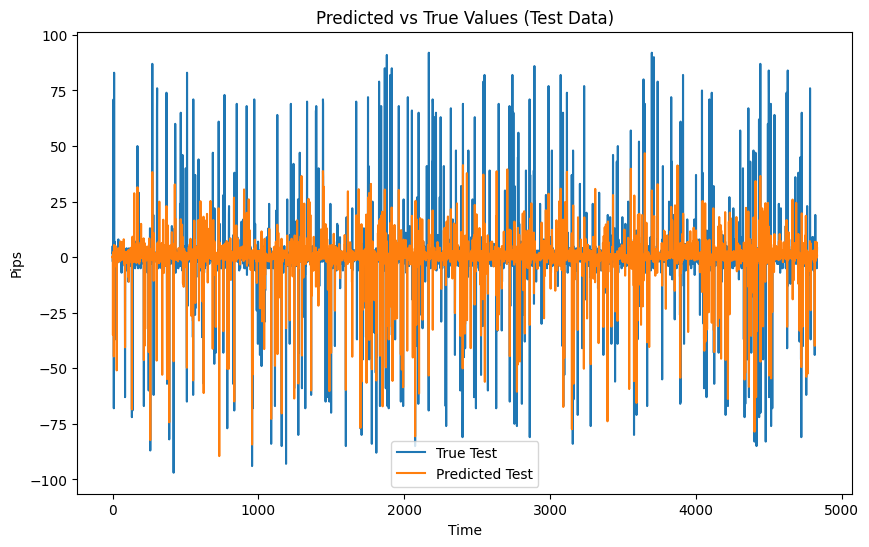

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True Test')
plt.plot(y_test_pred_rf, label='Predicted Test')
plt.title('Predicted vs True Values (Test Data)')
plt.xlabel('Time')
plt.ylabel('Pips')
plt.legend()
plt.show()

##KNeighborsRegressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Create the model
knn_model = KNeighborsRegressor()

# Train the model
knn_model.fit(X_train, y_train)

# Predict on the test set
y_test_pred_knn = knn_model.predict(X_test)

# Calculate test metrics
test_mae_knn = mean_absolute_error(y_test, y_test_pred_knn)
test_rmse_knn = mean_squared_error(y_test, y_test_pred_knn, squared=False)

print(f"KNN Test MAE: {test_mae_knn:.4f}")
print(f"KNN Test RMSE: {test_rmse_knn:.4f}")



KNN Test MAE: 6.0889
KNN Test RMSE: 13.7469


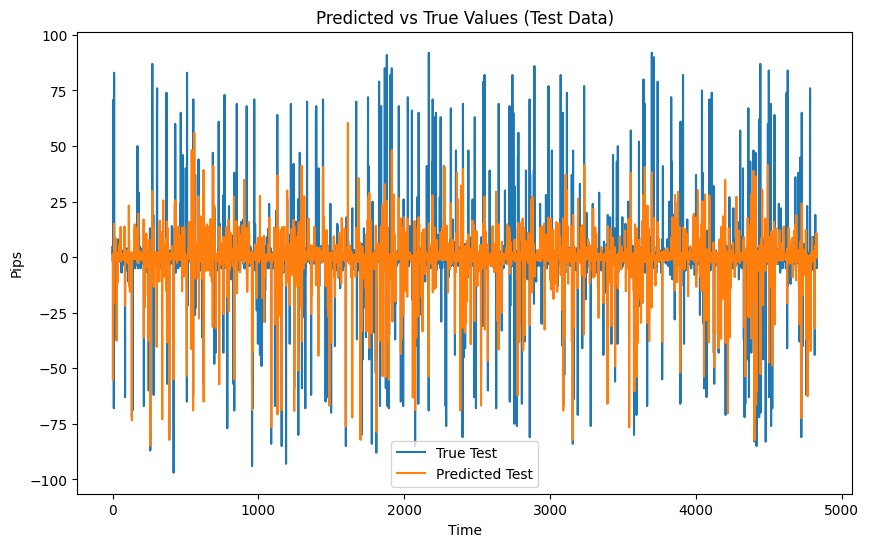

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True Test')
plt.plot(y_test_pred_knn, label='Predicted Test')
plt.title('Predicted vs True Values (Test Data)')
plt.xlabel('Time')
plt.ylabel('Pips')
plt.legend()
plt.show()

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

# Assuming X_train is your training data and it's a 2D array
num_features = X_train.shape[1]

# Create the model
mlp_model = Sequential()
mlp_model.add(Dense(units=128, activation='relu', input_shape=(num_features,)))
mlp_model.add(Dense(units=64, activation='relu'))
mlp_model.add(Dense(units=1, activation='linear'))

mlp_model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
mlp_model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

# Predict on the test set
y_test_pred_mlp = mlp_model.predict(X_test)

# Calculate test metrics
test_mae_mlp = mean_absolute_error(y_test, y_test_pred_mlp)
test_rmse_mlp = mean_squared_error(y_test, y_test_pred_mlp, squared=False)

print(f"MLP Test MAE: {test_mae_mlp:.4f}")
print(f"MLP Test RMSE: {test_rmse_mlp:.4f}")


Epoch 1/20
604/604 [==============================] - 3s 3ms/step - loss: 167.8226
Epoch 2/20
604/604 [==============================] - 2s 3ms/step - loss: 156.1914
Epoch 3/20
604/604 [==============================] - 3s 4ms/step - loss: 153.7297
Epoch 4/20
604/604 [==============================] - 2s 3ms/step - loss: 151.7101
Epoch 5/20
604/604 [==============================] - 2s 3ms/step - loss: 150.7034
Epoch 6/20
604/604 [==============================] - 2s 3ms/step - loss: 149.3836
Epoch 7/20
604/604 [==============================] - 2s 3ms/step - loss: 147.3462
Epoch 8/20
604/604 [==============================] - 2s 4ms/step - loss: 146.7520
Epoch 9/20
604/604 [==============================] - 3s 4ms/step - loss: 145.8545
Epoch 10/20
604/604 [==============================] - 2s 3ms/step - loss: 144.6603
Epoch 11/20
604/604 [==============================] - 2s 3ms/step - loss: 144.1871
Epoch 12/20
604/604 [==============================] - 2s 3ms/step - loss: 143.2952
E

Based on the evaluation results, the **LSTM GridSearch** model outperformed the other models in terms of test loss. The **LSTM GridSearch** achieved a test loss of 0.3135, while the basic **LSTM model** had a significantly higher test mean absolute error (MAE) of 7.3466. This improvement is quite remarkable and demonstrates the effectiveness of the hyperparameter tuning performed during the GridSearch process.

Among the other models, the **Gradient Boosting Regressor (GBM)** and the **Random Forest Regressor** also performed quite well, achieving test MAEs of 5.2751 and 5.5712, respectively. These models are known for their ability to handle complex relationships and capture non-linear patterns in the data, making them suitable choices for regression tasks.

The **Linear Regression model**, although simple, delivered reasonable results with a test MAE of 5.9169. However, it may not be as effective in capturing intricate patterns in the data as the more sophisticated ensemble models like GBM and Random Forest.

The **Support Vector Machine (SVM)** and **XGBoost** models also performed adequately, with test MAEs of 5.4045 and 5.5461, respectively. SVM is a powerful algorithm for regression, especially in high-dimensional spaces, while XGBoost is known for its boosting technique that improves model performance by combining weak learners.

The **K-Nearest Neighbors (KNN)** and **Multi-Layer Perceptron (MLP)** models achieved test MAEs of 6.0889 and 5.5787, respectively. While these models are decent performers, they seem to be slightly outperformed by the previously mentioned models.

The reason behind the success of the **LSTM GridSearch** model is the systematic exploration of hyperparameters during the GridSearch process. LSTMs are capable of capturing long-term dependencies in sequential data, but their performance heavily relies on appropriate hyperparameter settings. The GridSearch method helps to find the optimal combination of hyperparameters, leading to better generalization and improved performance on unseen data.


##Conclusion

Here's a step-by-step breakdown of the code:

**Data Preprocessing**:

The code reads the data from an Excel file named '575.xlsx' and extracts features from lists in specific columns using a custom function 'extract_numbers'.

**LSTM Model Training**

Built an LSTM neural network model with 64 units and a dense layer with 1 unit for regression.
It normalizes the data using Min-Max scaling and reshapes it to fit the LSTM input shape.
The model is trained on the training data for 10 epochs using the mean squared error loss and the Adam optimizer.

**Model Evaluation**:

The model's performance is evaluated on both training and testing datasets using the mean squared error loss.
The model's predictions are also demonstrated using a new input sequence.
Hyperparameter Tuning:

The code performs hyperparameter tuning for the LSTM model using GridSearchCV for different units, dropout rates, and L2 regularization values.

**Evaluation of Other Models:**

The code implements Linear Regression, Gradient Boosting Regressor, SVR, and XGBoost models for comparison with the LSTM model.
The performance metrics (MAE and RMSE) for each model are calculated and plotted.